**This notebook demonstrates construction of an approximation to $\sqrt{T}$**
$$
   \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
   \newcommand{\ket}[1]{\left|{#1}\right\rangle}
   \newcommand{\bra}[1]{\left\langle{#1}\right|}
$$

In [1]:
import os, sys
%matplotlib inline
import matplotlib.pyplot as plt
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.visualization import plot_bloch_vector
import numpy as np

# Import local tools
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import backend_tools
import tools

# Get a backend
IBMQ.load_accounts()
simulator = backend_tools.get_device(use_sim=True, min_qubits=1)

# Constants
X = 0
Y = 1
Z = 2

Circuit 1: T


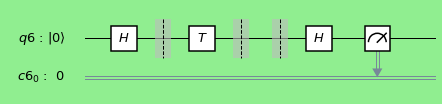

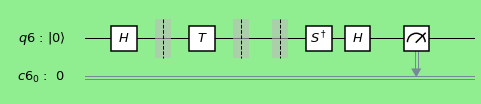

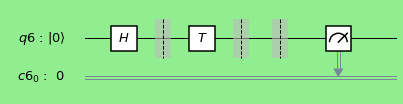

Circuit 2: sqrt(T)


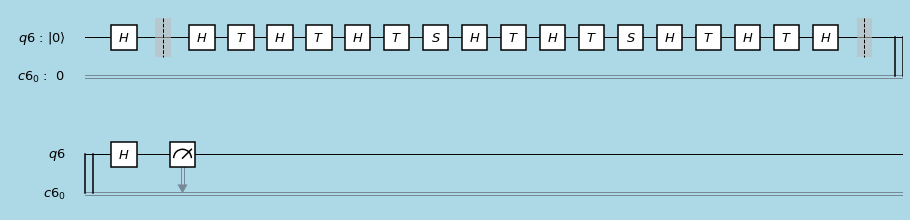

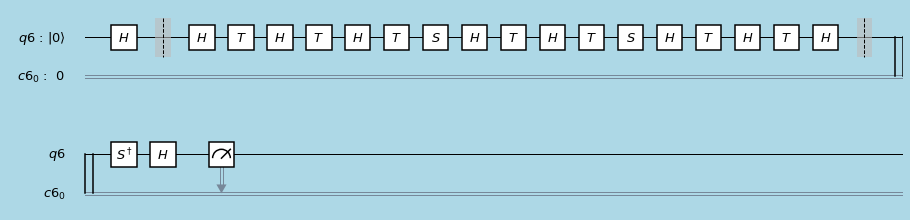

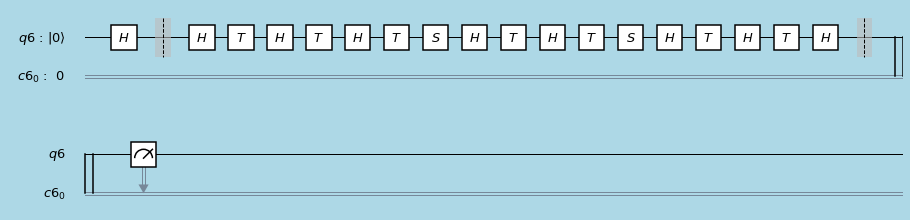

Circuit 2: sqrt(T)


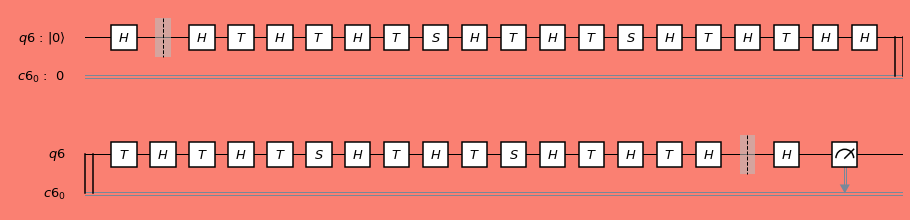

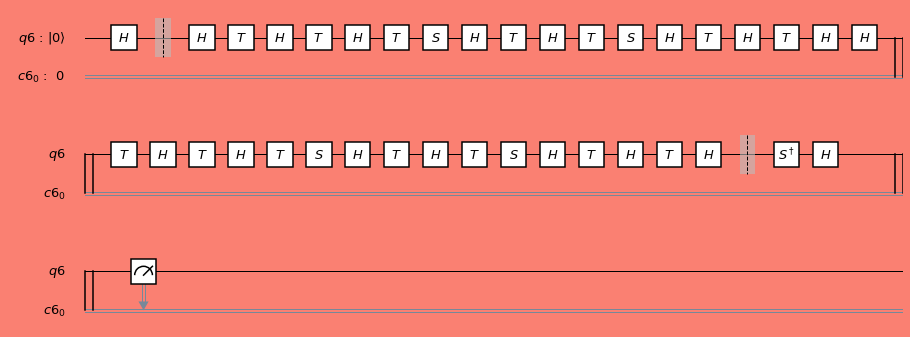

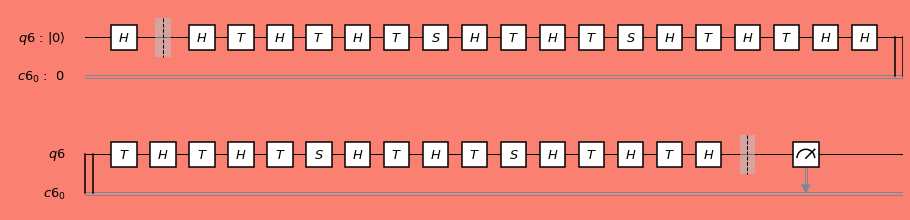

In [12]:
# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

# Build the circuits
circuits = []

# Measurement tools
meas_x = QuantumCircuit(q, c)
meas_x.barrier()
meas_x.h(q)
meas_x.measure(q, c)

meas_y = QuantumCircuit(q, c)
meas_y.barrier()
meas_y.sdg(q)
meas_y.h(q)
meas_y.measure(q, c)

meas_z = QuantumCircuit(q, c)
meas_z.barrier()
meas_z.measure(q, c)

# Circuit 1: apply T to |+>
circuit = QuantumCircuit(q, c)
circuit.h(q)
circuit.barrier()
circuit.t(q)
circuit.barrier()
circuits.append(circuit + meas_x)
circuits.append(circuit + meas_y)
circuits.append(circuit + meas_z)

# Draw the circuits
print("Circuit 1: T")
style = {'backgroundcolor': 'lightgreen'}
tools.show_figure(circuits[X].draw(output='mpl', plot_barriers=True, reverse_bits=True, style=style, scale=0.6))
tools.show_figure(circuits[Y].draw(output='mpl', plot_barriers=True, reverse_bits=True, style=style, scale=0.6))
tools.show_figure(circuits[Z].draw(output='mpl', plot_barriers=True, reverse_bits=True, style=style, scale=0.6))

# Circuit 2: apply sqrt(T) to |+>
circuit = QuantumCircuit(q, c)
circuit.h(q)
circuit.barrier()

sqrt_T = QuantumCircuit(q, c)
sqrt_T.h(q)
sqrt_T.t(q)
sqrt_T.h(q)
sqrt_T.t(q)
sqrt_T.h(q)
sqrt_T.t(q)
sqrt_T.s(q)
sqrt_T.h(q)
sqrt_T.t(q)
sqrt_T.h(q)
sqrt_T.t(q)
sqrt_T.s(q)
sqrt_T.h(q)
sqrt_T.t(q)
sqrt_T.h(q)
sqrt_T.t(q)
sqrt_T.h(q)

circuits.append(circuit + sqrt_T + meas_x)
circuits.append(circuit + sqrt_T + meas_y)
circuits.append(circuit + sqrt_T + meas_z)
    
# Draw the circuits
print("Circuit 2: sqrt(T)")
style = {'backgroundcolor': 'lightblue'}
tools.show_figure(circuits[X+3].draw(output='mpl', plot_barriers=True, reverse_bits=True, style=style, scale=0.6))
tools.show_figure(circuits[Y+3].draw(output='mpl', plot_barriers=True, reverse_bits=True, style=style, scale=0.6))
tools.show_figure(circuits[Z+3].draw(output='mpl', plot_barriers=True, reverse_bits=True, style=style, scale=0.6))

# Circuit 3: apply sqrt(T).sqrt(T) to |+>
circuit = QuantumCircuit(q, c)
circuit.h(q)
circuit.barrier()
circuits.append(circuit + sqrt_T + sqrt_T + meas_x)
circuits.append(circuit + sqrt_T + sqrt_T + meas_y)
circuits.append(circuit + sqrt_T + sqrt_T + meas_z)
    
# Draw the circuits
print("Circuit 2: sqrt(T)")
style = {'backgroundcolor': 'salmon'}
tools.show_figure(circuits[X+6].draw(output='mpl', plot_barriers=True, reverse_bits=True, style=style, scale=0.6))
tools.show_figure(circuits[Y+6].draw(output='mpl', plot_barriers=True, reverse_bits=True, style=style, scale=0.6))
tools.show_figure(circuits[Z+6].draw(output='mpl', plot_barriers=True, reverse_bits=True, style=style, scale=0.6))

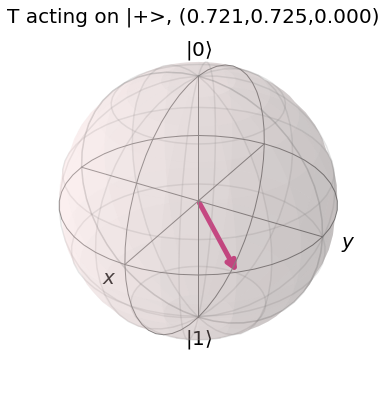

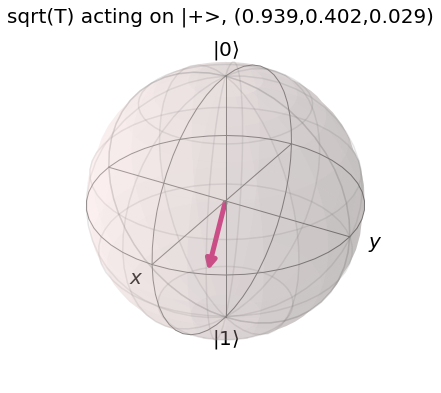

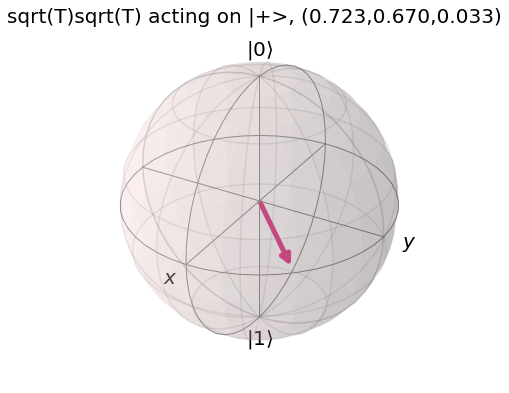

In [15]:
# Execute the circuits
no_shots = 1024
job = execute(circuits, backend=simulator, shots=no_shots)
result = job.result()

bloch_vector = ['x', 'y', 'z']

titles = ['T acting on |+>', 'sqrt(T) acting on |+>', 'sqrt(T)sqrt(T) acting on |+>']
# Plot the result
for index in range(round(len(circuits)/3)):
    bloch = [0, 0, 0]
    for bloch_index in range(len(bloch_vector)):
        data = result.get_counts(circuits[3*index+bloch_index])
        try:
            p0 = data['0']/no_shots
        except KeyError:
            p0 = 0
        try:
            p1 = data['1']/no_shots
        except KeyError:
            p1 = 0
        bloch[bloch_index] = p0-p1
    tools.show_figure(plot_bloch_vector(bloch, title=titles[index] + ', ({:.3f},{:.3f},{:.3f})'.format(
        bloch[X], bloch[Y], bloch[Z])))